In [1]:
%run demo_model_pes_lib.ipynb

In [2]:
import numpy as np
import torch
from torch.autograd import grad
import torch.nn as nn
from scipy import linalg as LA
import tqdm
from ase.calculators.mopac import MOPAC
from ase import Atoms
import matplotlib.pyplot as plt

In [3]:
pos = [[0,0,0],[1,1,1]]
a = Atoms('C2',positions=pos)
a.calc = MOPAC(label='C2', task='PM7 1SCF UHF')
e = a.get_potential_energy()

In [4]:
e

-233.82047

In [26]:
pos = [[0,0,0]]
a = Atoms('H',positions=pos)
a.calc = MOPAC(label='H', task='PM7 1SCF UHF')
e = a.get_potential_energy()

In [27]:
e

-11.07011

In [7]:
X, y = compute_data(40)

  0%|          | 0/40 [00:00<?, ?it/s]

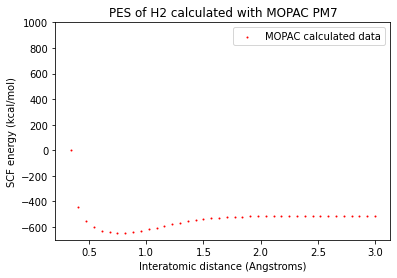

In [8]:
plot(X,y)

In [9]:
def solve_KRR(kernel,X,y,a):
    
    n = X.shape[0]
    K = np.zeros((n,n))
    
    # Computation of the Gram matrix, using the kernel directly
    for i in range(n):
        for j in range(n):
            K[i][j] = kernel(X[i],X[j])
            
    # Solving the linear system
    w = LA.solve(K + a * np.identity(K.shape[1]),y,assume_a='sym')
    w = torch.tensor(w, dtype=torch.float64)
    
    # The prediction function
    def f(x):
        Kv = torch.zeros(n, dtype=torch.float64)
        for i in range(n):
            Kv[i] = kernel(x,X[i])
        return Kv @ w
    
    return f

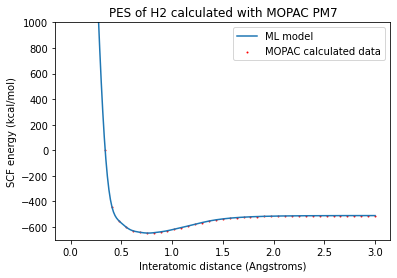

In [24]:
model = fit(0.16,0.0)

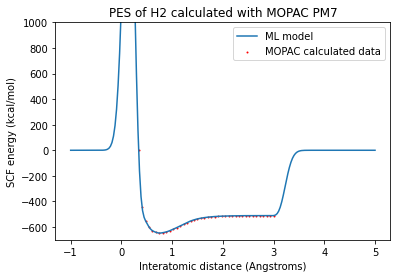

In [25]:
model = fit_out(0.15,0.0)